In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
file_path = r"C:\Users\pca_9\Desktop\visualization\02_activities\assignments\assignment_3\Marriage Licence Statistics Data.csv"
df = pd.read_csv(file_path)

df['DATE'] = pd.to_datetime(df['TIME_PERIOD'])
df = df[(df['DATE'].dt.year >= 2011) & (df['DATE'].dt.year <= 2024)]

city_monthly_totals = df.groupby('DATE')['MARRIAGE_LICENSES'].sum().reset_index()
city_monthly_totals['Month'] = city_monthly_totals['DATE'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

seasonal_averages = city_monthly_totals.groupby('Month')['MARRIAGE_LICENSES'].mean().reindex(month_order).reset_index()




C:\Users\pca_9\AppData\Local\Temp\ipykernel_14904\173376014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


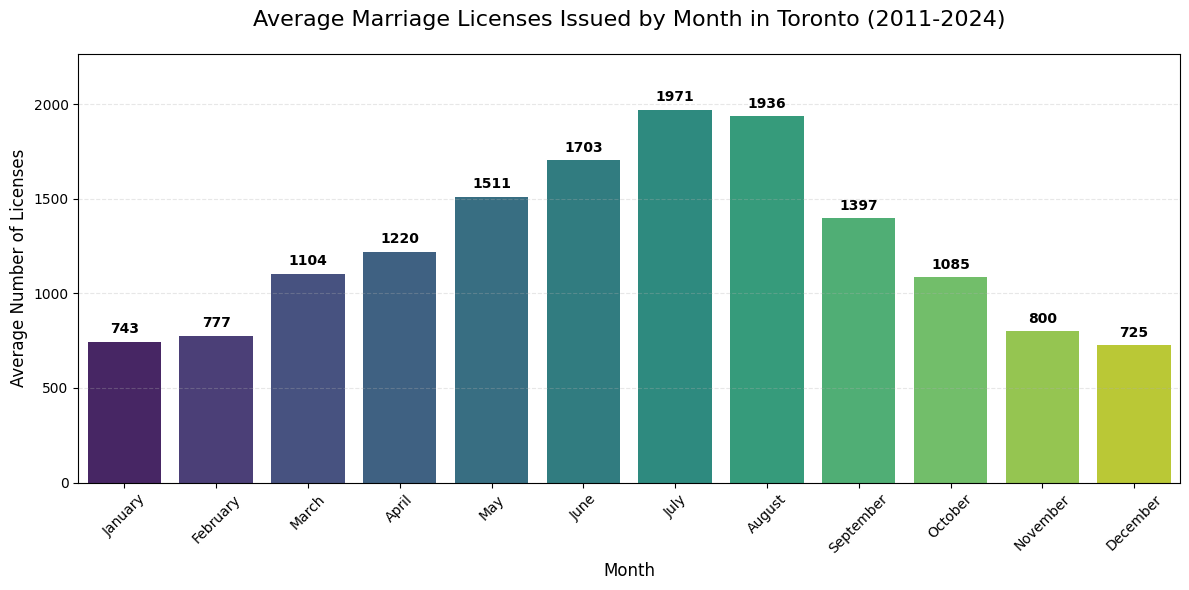

In [9]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=seasonal_averages, 
    x='Month', 
    y='MARRIAGE_LICENSES', 
    palette='viridis' # Uses a clear, high-contrast color scale
)

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points',
                   fontsize=10, fontweight='bold')
    
    plt.title('Average Marriage Licenses Issued by Month in Toronto (2011-2024)', fontsize=16, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Number of Licenses', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, seasonal_averages['MARRIAGE_LICENSES'].max() * 1.15) # Leave space for labels
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()